Dataset Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


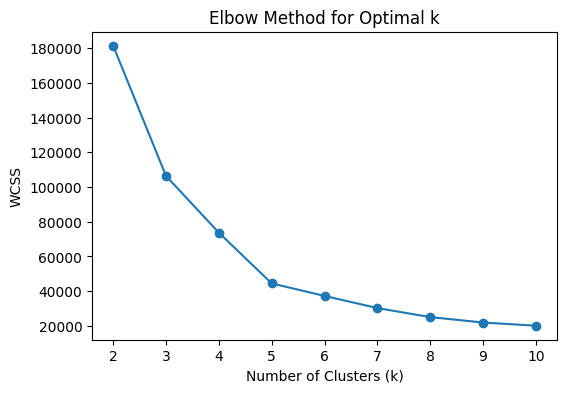

Silhouette Score: 0.553931997444648


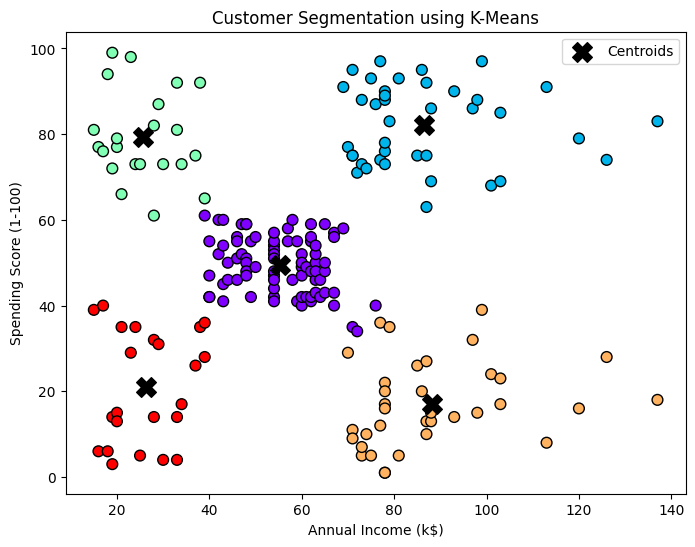

In [1]:
# Task: Clustering with K-Means

# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load Dataset

df = pd.read_csv(r"C:\Users\rines\Downloads\archive (15)\Mall_Customers.csv")
print("Dataset Shape:", df.shape)
print(df.head())

# Preprocessing 
# We'll use features 'Annual Income' and 'Spending Score'
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Elbow Method to find optimal K
wcss = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

# Fit K-Means with chosen k (say k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)
df["Cluster"] = y_kmeans

# Silhouette Score 
score = silhouette_score(X, y_kmeans)
print("Silhouette Score:", score)

# Visualization (2D)
plt.figure(figsize=(8,6)
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=y_kmeans, cmap="rainbow", s=60, edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c="black", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

